In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

## Oversampling, Undersampling
from imblearn import over_sampling, under_sampling

## Dimension Reduction
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import time
import matplotlib.patches as mpatches

In [9]:
# Credit-card kaggle
cc_df = pd.read_csv("creditcard.csv")

# X: features
x_cc = cc_df.iloc[:,1:30]
x_cc = np.array(x_cc)

# Y: labels
y_cc = cc_df['Class'].values

# Original
x_train, x_test, y_train, y_test = train_test_split(
    x_cc,
    y_cc,
    stratify = y_cc,
    random_state=42)

In [4]:
samplers = [over_sampling.SMOTE(random_state=42, sampling_strategy=0.5),
          over_sampling.ADASYN(random_state=42),
          over_sampling.RandomOverSampler(random_state=42),
            over_sampling.SVMSMOTE(random_state=42),          
            over_sampling.BorderlineSMOTE(random_state=42,kind='borderline1'),
            under_sampling.ClusterCentroids(random_state=42), 
            under_sampling.RandomUnderSampler(random_state=42),  
            under_sampling.NearMiss(random_state=42, version=3),
            under_sampling.TomekLinks(), 
            under_sampling.EditedNearestNeighbours(),
            under_sampling.NeighbourhoodCleaningRule(),
            under_sampling.OneSidedSelection()
           ]

In [14]:
def plot_dim(x, y, sample):
    
    # Resample 
    x, y = sample.fit_resample(x, y)
    
    # Title 
    legend = re.match(r'(.+?)\(.+?',str(sample)).group(1)

    # T-SNE Implementation
    t0 = time.time()
    X_reduced_tsne = TSNE(n_components=2, random_state=10).fit_transform(x)
    t1 = time.time()
    print("T-SNE took {:.2} s".format(t1 - t0))    

    # PCA Implementation
    t0 = time.time()
    X_reduced_pca = PCA(n_components=2, random_state=10).fit_transform(x)
    t1 = time.time()
    print("PCA took {:.2} s".format(t1 - t0))

    # TruncatedSVD
    t0 = time.time()
    X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=10).fit_transform(x)
    t1 = time.time()
    print("Truncated SVD took {:.2} s".format(t1 - t0))

    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
    # labels = ['No Fraud', 'Fraud']
    f.suptitle('{} clusters with DR'.format(legend), fontsize=14)


    blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
    red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


    # t-SNE scatter plot
    ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], s=4, c=(y == 0),
                cmap='coolwarm', label='No Fraud', linewidths=2)
    ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], s=4, c=(y == 1),
                cmap='coolwarm', label='Fraud', linewidths=2)
    ax1.set_title('t-SNE', fontsize=14)

    ax1.grid(True)

    ax1.legend(handles=[blue_patch, red_patch])


    # PCA scatter plot
    ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], s=4, c=(y == 0),
                cmap='coolwarm', label='No Fraud', linewidths=2)
    ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], s=4, c=(y == 1),
                cmap='coolwarm', label='Fraud', linewidths=2)
    ax2.set_title('PCA', fontsize=14)

    ax2.grid(True)

    ax2.legend(handles=[blue_patch, red_patch])

    # TruncatedSVD scatter plot
    ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], s=4, c=(y == 0),
                cmap='coolwarm', label='No Fraud', linewidths=2)
    ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], s=4, c=(y == 1),
                cmap='coolwarm', label='Fraud', linewidths=2)
    ax3.set_title('Truncated SVD', fontsize=14)

    ax3.grid(True)

    ax3.legend(handles=[blue_patch, red_patch])

    plt.show()

T-SNE took 5.3e+03 s
PCA took 1.1 s
Truncated SVD took 0.74 s


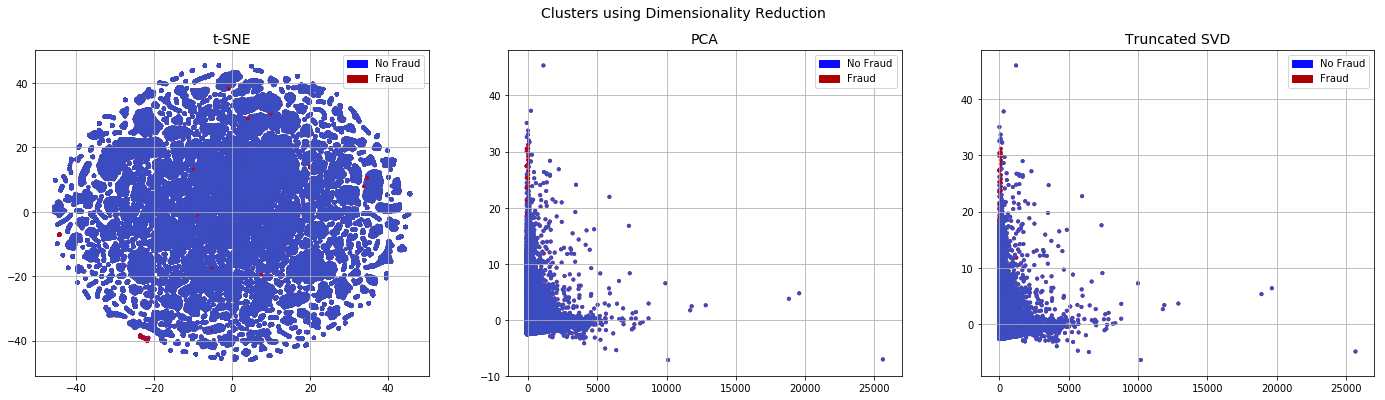

In [9]:
plot_dim(x_cc, y_cc)

T-SNE took 4.1e+03 s
PCA took 0.57 s
Truncated SVD took 0.42 s


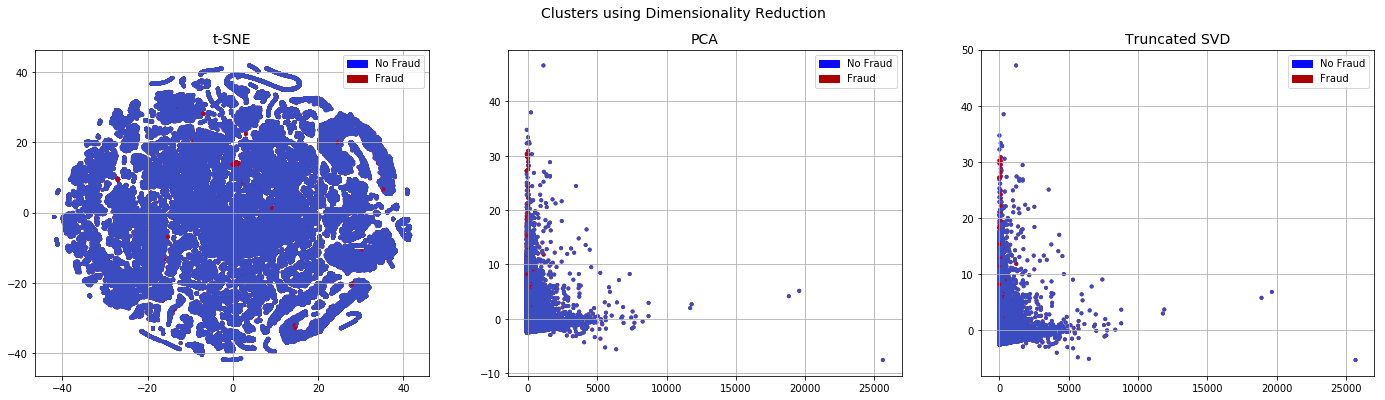

In [12]:
plot_dim(x_train, y_train)

T-SNE took 6.8e+03 s
PCA took 1.0 s
Truncated SVD took 0.91 s


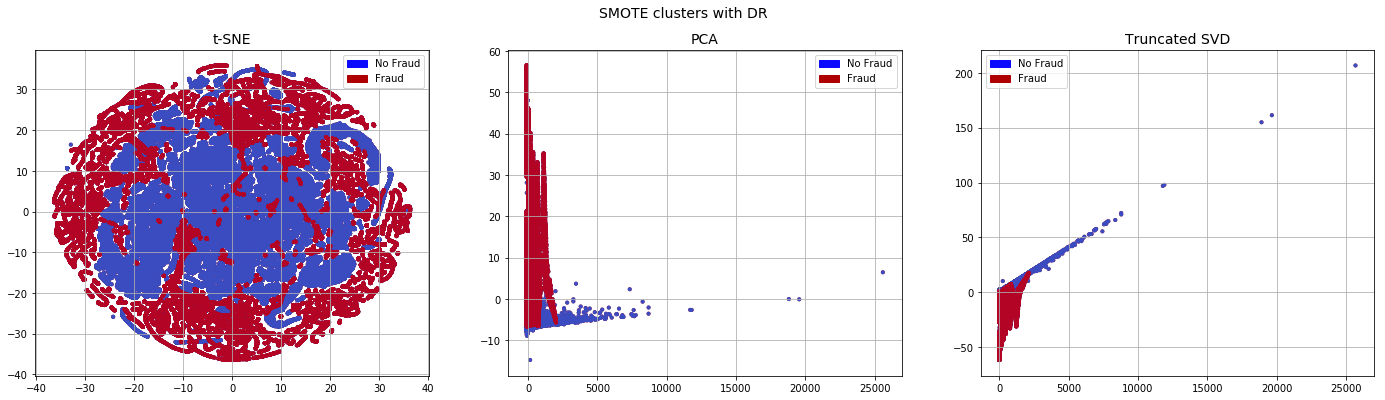

T-SNE took 7.6e+03 s
PCA took 1.7 s
Truncated SVD took 1.3 s


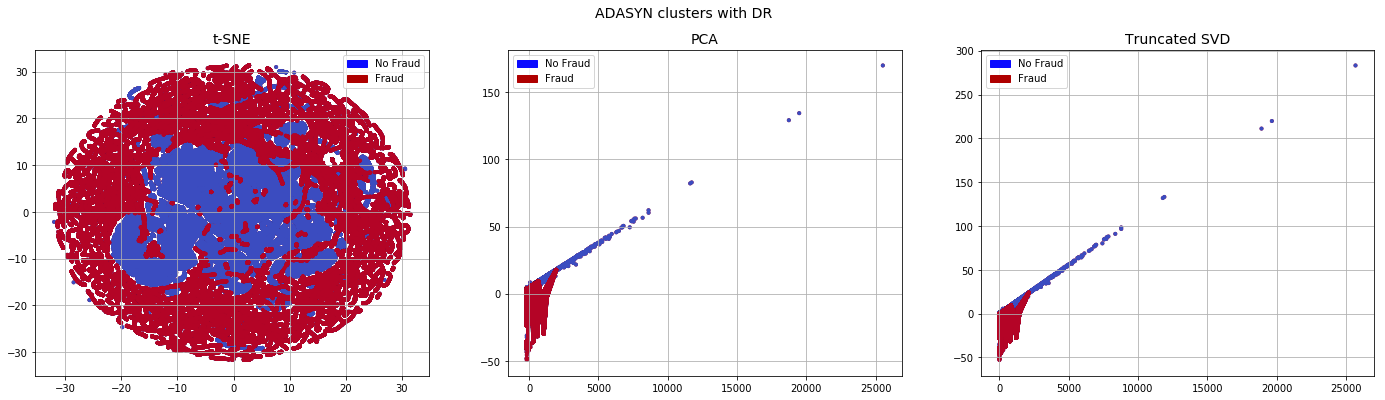

T-SNE took 7.2e+03 s
PCA took 1.6 s
Truncated SVD took 1.3 s


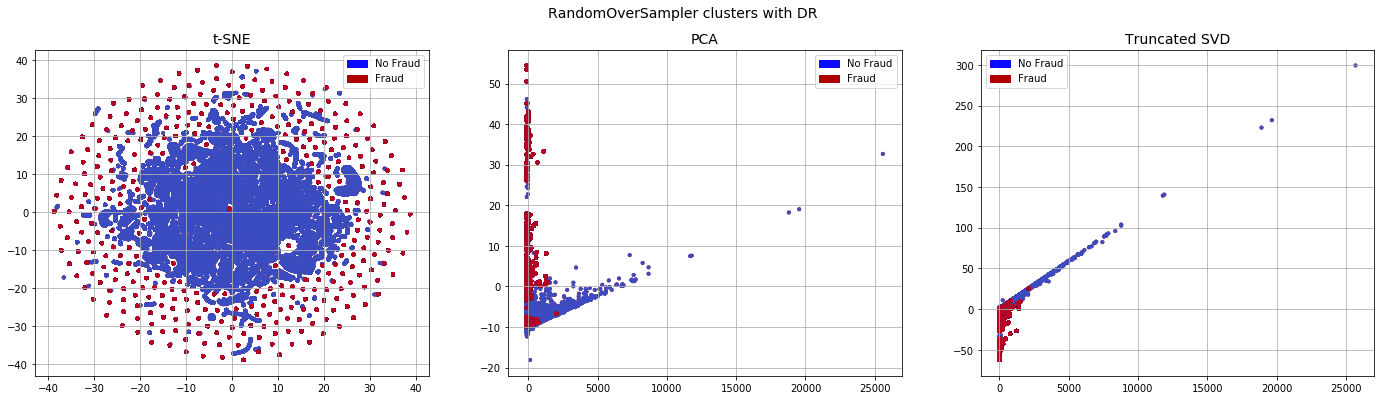

T-SNE took 9.4e+03 s
PCA took 1.6 s
Truncated SVD took 1.2 s


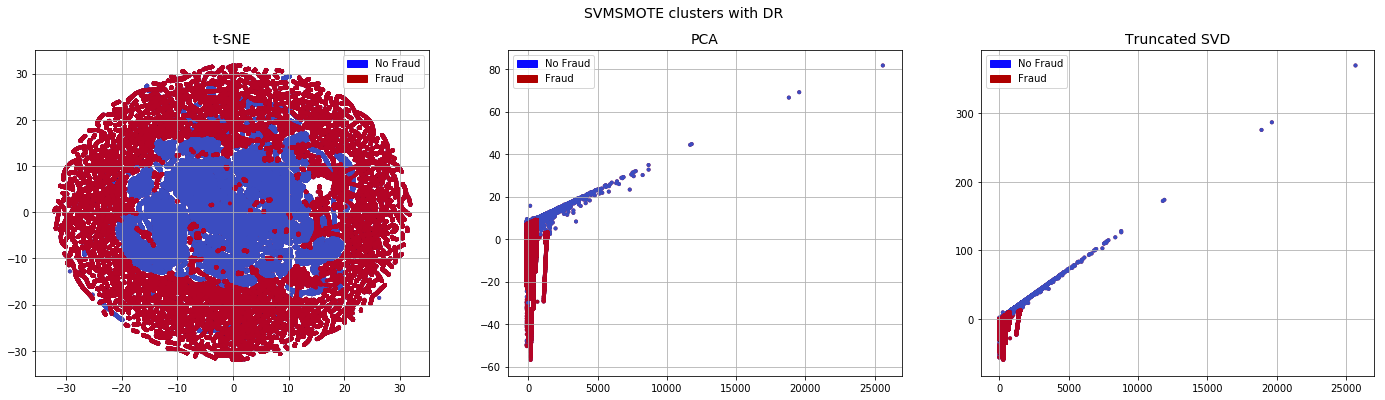

ValueError: The possible "kind" of algorithm are "borderline-1" and "borderline-2".Got borderline1 instead.

In [15]:
for sample in samplers:
    plot_dim(x_train, y_train, sample)